# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, Normalizer

## Regression Model Evaluation

In [2]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [3]:
pipeline = [
    StandardScaler(),
    Normalizer()
]

transformer = make_pipeline(*pipeline)

X_data = transformer.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [5]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [6]:
y_pred = model.predict(X_train)

In [7]:
y_test_pred = model.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [8]:
r2_score(y_train, y_pred)

0.6773923396498225

In [9]:
r2_score(y_test, y_test_pred)

0.6273213449852941

## 4. Calculate and print mean squared error for both the training and the testing set.

In [10]:
mean_squared_error(y_train, y_pred)

26.884720868148296

In [11]:
mean_squared_error(y_test, y_test_pred)

32.96028341064088

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [12]:
mean_absolute_error(y_train, y_pred)

3.727259182843345

In [13]:
mean_absolute_error(y_test, y_test_pred)

4.089196575467575

## Classification Model Evaluation

In [14]:
from sklearn.datasets import load_iris

data = load_iris()

X2 = pd.DataFrame(data["data"], columns=data["feature_names"])
y2 = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X2, y2], axis=1)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [15]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [ ]:
model2 = LogisticRegression()

model2.fit(X2_train, y2_train)

In [17]:
y2_pred = model2.predict(X2_train)
y2_pred.shape

(120,)

In [18]:
y2_train.shape

(120, 1)

In [19]:
y2_test_pred = model2.predict(X2_test)
y2_test_pred.shape

(30,)

In [20]:
y2_test.shape

(30, 1)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [33]:
print(accuracy_score(y2_train, np.round(y2_pred),2))

0.975


In [22]:
print(accuracy_score(y2_test, np.round(y2_test_pred),2))

0.9333333333333333


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [23]:
print(balanced_accuracy_score(y2_train, y2_pred))

0.9740454740454741


In [24]:
print(balanced_accuracy_score(y2_test, y2_test_pred))

0.9326923076923078


## 10. Calculate and print the precision score for both the training and the testing set.

In [25]:
print(precision_score(y2_train, y2_pred, average='weighted'))

0.9751561154177434


In [26]:
print(precision_score(y2_test, y2_test_pred, average='weighted'))

0.9333333333333333


## 11. Calculate and print the recall score for both the training and the testing set.

In [27]:
print(recall_score(y2_train, y2_pred, average='weighted'))

0.975


In [28]:
print(recall_score(y2_test, y2_test_pred, average='weighted'))

0.9333333333333333


## 12. Calculate and print the F1 score for both the training and the testing set.

In [29]:
print(f1_score(y2_train, y2_pred, average='weighted'))

0.9749758259468171


In [30]:
print(f1_score(y2_test, y2_test_pred, average='weighted'))

0.9333333333333333


## 13. Generate confusion matrices for both the training and the testing set.

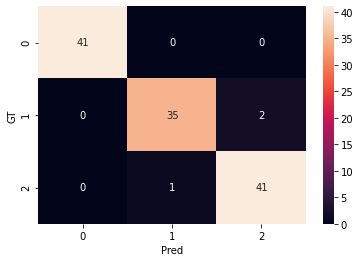

In [31]:
cm = confusion_matrix(y2_train,y2_pred)


sns.heatmap(cm,annot=True)
plt.xlabel("Pred")
plt.ylabel("GT")
plt.show()

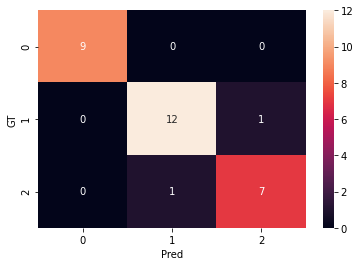

In [32]:
cm = confusion_matrix(y2_test,y2_test_pred)

sns.heatmap(cm,annot=True)
plt.xlabel("Pred")
plt.ylabel("GT")
plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
m1 = RandomForestClassifier()

In [ ]:
m1.fit(X2_train, y2_train)

In [64]:
y2_pred = m1.predict(X2_train)

In [65]:
y2_test_pred = m1.predict(X2_test)

In [73]:
print(accuracy_score(y2_train, np.round(y2_pred),2))
print(accuracy_score(y2_test, np.round(y2_test_pred),2))

1.0
0.9333333333333333


In [67]:
print(balanced_accuracy_score(y2_train, y2_pred))
print(balanced_accuracy_score(y2_test, y2_test_pred))

1.0
0.9326923076923078


In [68]:
print(precision_score(y2_train, y2_pred, average='weighted'))
print(precision_score(y2_test, y2_test_pred, average='weighted'))

1.0
0.9333333333333333


In [69]:
print(recall_score(y2_train, y2_pred, average='weighted'))
print(recall_score(y2_test, y2_test_pred, average='weighted'))

1.0
0.9333333333333333


In [70]:
print(f1_score(y2_train, y2_pred, average='weighted'))
print(f1_score(y2_test, y2_test_pred, average='weighted'))

1.0
0.9333333333333333


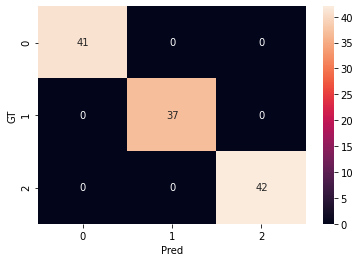

In [71]:
cm = confusion_matrix(y2_train,y2_pred)


sns.heatmap(cm,annot=True)
plt.xlabel("Pred")
plt.ylabel("GT")
plt.show()

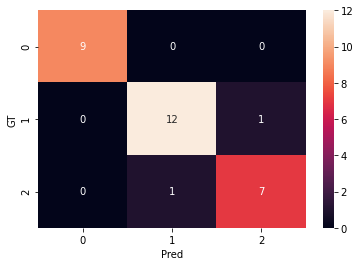

In [72]:
cm = confusion_matrix(y2_test,y2_test_pred)

sns.heatmap(cm,annot=True)
plt.xlabel("Pred")
plt.ylabel("GT")
plt.show()

- PARECE QUE LO HACE ALGO MEJOR EL RANDOM FOREST QUE LA REGRESIÓN LOGÍSTICA EN EL ÚLTIMO CASO

## Con las funciones que nos dejó Marc

In [76]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

printMetric = lambda label,value:print(f"\t {label}: {round(value,3)}")
models = {
    "logis": LogisticRegression(C=10,solver="lbfgs"),
    "logis-2": LogisticRegression(C=1,solver="lbfgs"),
    "svm-linear": CalibratedClassifierCV(LinearSVC(),cv=3),
    "svm-rbf": CalibratedClassifierCV(SVC(kernel="sigmoid",gamma="auto"),cv=3),
    "randomforest": RandomForestClassifier(n_estimators=100),
}

In [ ]:
for name,m in models.items():
    print(f"Training {name}...")
    m.fit(X2_train, y2_train)

In [83]:
for name, model in models.items():
    y2_pred = model.predict(X2_test)
    print(f"Evaluating model {name}")
    printMetric("Accuracy",accuracy_score(y2_test, y2_pred))
    printMetric("Precision",precision_score(y2_test, y2_pred,average="weighted"))
    printMetric("Recall",recall_score(y2_test, y2_pred,average="weighted"))
    printMetric("F1Score",f1_score(y2_test, y2_pred,average="weighted"))

Evaluating model logis
	 Accuracy: 0.967
	 Precision: 0.97
	 Recall: 0.967
	 F1Score: 0.967
Evaluating model logis-2
	 Accuracy: 0.933
	 Precision: 0.933
	 Recall: 0.933
	 F1Score: 0.933
Evaluating model svm-linear
	 Accuracy: 0.933
	 Precision: 0.933
	 Recall: 0.933
	 F1Score: 0.933
Evaluating model svm-rbf
	 Accuracy: 0.5
	 Precision: 0.359
	 Recall: 0.5
	 F1Score: 0.389
Evaluating model randomforest
	 Accuracy: 0.933
	 Precision: 0.933
	 Recall: 0.933
	 F1Score: 0.933


/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
